# Домашняя работа №1

В этой домашней работе вам предлагается ознакомиться с базовой функциональностью Python и устройством Jupyter Notebook, а так же познакомиться с простыми функциями из пакетов NumPy и matplotlib.

Следуйте инструкциям нотебука, решайте задачи, а ответы заполняйте в следующую форму: https://forms.gle/gxG8D5BGeH1nxcSU8

In [1]:
!ls

README.md          assignment_1       tasks.py
__pycache__        assignment_1.ipynb


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tasks import find_fold_number, rle, test_rle_str

# увеличим изначальный размер графиков
plt.figure(figsize=(15, 10))

# отображение графиков внутри нотебука
%matplotlib inline
# графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 
# автоматическая перезагрузка функций из локальных модулей
%load_ext autoreload
%autoreload 2

# NumPy & matplotlib

Для следующих заданий необходимо реализовать код внутри ячейки. Постарайтесь воспользоваться функциональностью пакетов, избегая ненужных циклов и т.п.

Про `NumPy` можно почитать тут:
[NumPy quickstart](https://docs.scipy.org/doc/numpy/user/quickstart.html)

Про `matplotlib` тут:
[PyPlot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html)

В данной части задания будут базироваться на датасете $\textit{Ирисы Фишера}$, первым делом его необходимо скачать

In [3]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data -P assignment_1/data

--2020-03-01 17:22:28--  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4551 (4.4K) [application/x-httpd-php]
Saving to: ‘assignment_1/data/iris.data.5’

iris.data.5         100%[===================>]   4.44K  --.-KB/s    in 0.02s   

2020-03-01 17:22:29 (230 KB/s) - ‘assignment_1/data/iris.data.5’ saved [4551/4551]



Ирисы Фишера состоят из данных о 150 экземплярах ириса — Ирис щетинистый (Iris setosa), Ирис виргинский (Iris virginica) и Ирис разноцветный (Iris versicolor). Для каждого экземпляра измерялись четыре характеристики (в сантиметрах):

1. Длина наружной доли околоцветника (англ. sepal length);
2. Ширина наружной доли околоцветника (англ. sepal width);
3. Длина внутренней доли околоцветника (англ. petal length);
4. Ширина внутренней доли околоцветника (англ. petal width).

In [4]:
iris_full = np.genfromtxt('assignment_1/data/iris.data', delimiter=',', dtype='object')
names = ('sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'species')
iris_vals = iris_full[:, :-1].astype(np.float)
iris_name = iris_full[:, -1].astype(np.str)
n_iris = iris_vals.shape[0]

In [20]:
n_rows = 150
template = '{:^15}' * len(names)
print(template.format(*names))
for vals, name in zip(iris_vals[:n_rows], iris_name[:n_rows]):
    print(template.format(*vals, name))

  Iris-setosa  Iris-versicolorIris-virginica 
      5.1            3.5            1.4      
      4.9            3.0            1.4      
      4.7            3.2            1.3      
      4.6            3.1            1.5      
      5.0            3.6            1.4      
      5.4            3.9            1.7      
      4.6            3.4            1.4      
      5.0            3.4            1.5      
      4.4            2.9            1.4      
      4.9            3.1            1.5      
      5.4            3.7            1.5      
      4.8            3.4            1.6      
      4.8            3.0            1.4      
      4.3            3.0            1.1      
      5.8            4.0            1.2      
      5.7            4.4            1.5      
      5.4            3.9            1.3      
      5.1            3.5            1.4      
      5.7            3.8            1.7      
      5.1            3.8            1.5      
      5.4            3.4          

## 1. Какое максимальное значение для каждого признака
Ответом будет последовательность из 4 чисел  
Например: `5.1 3.5 1.4 0.2`

In [6]:
print(iris_vals.max(axis=0))
#print(np.amax(iris_vals[:,1]), end=' ')
#print(np.amax(iris_vals[:,2]), end=' ')
#print(np.amax(iris_vals[:,3]), end=' ')

[7.9 4.4 6.9 2.5]


## 2. Сколько каждого типа ириса представленно в данных
Ответом будет последовательность из 3 чисел в порядке: `Iris-setosa, Iris-versicolor, Iris-virginica`  
Например: `10 10 10`

In [7]:
names, counts = (np.unique(iris_name, return_counts=True)); print(counts)

[50 50 50]


## 3. Среднее значение признака `petalwidth` для каждого типа ириса
Ответом будет последовательность в возврастающем порядке с округлением до 2 знаков после запятой.  
Например: `1.23 4.56 7.89` 

In [8]:
print(iris_full.shape)
print(np.mean(iris_full[0:50, 3:4],dtype=np.float64))
print(np.mean(iris_full[50:100, 3:4],dtype=np.float64))
print(np.mean(iris_full[100:150, 3:4],dtype=np.float64))
#np.vstack((iris_vals[:, 3], iris_name)).T

(150, 5)
0.24399999999999994
1.3259999999999998
2.026


## 4. Попарное скалярное произведение признаков
Ответом будет среднее значение попарных скалярных произведений векторов признаков с округлением до 2 знаков после запятой.  
Скалярное произведение вектора с самим собой учитывать не надо.  
Например: `12.34`

In [9]:
np.mean([(iris_vals[:, i].T).dot(iris_vals[:, j]) for i in range(0, 4) for j in range(0, 4) if i != j], dtype=np.float64)

1726.2150000000001

## 5. У какого типа ириса самое маленькое значение признака `sepalwidth`

In [23]:
index = np.where(iris_full[:, 1] == np.amin(iris_full[:, 1]))
print(names[np.floor_divide(index, 50)])

[['Iris-versicolor']]


## 6. Постройте график распределения значений для `petallength` взависимости от типа ириса
В качестве ответа укажите тип ириса с наименьшей дисперсией (самый "узкий")

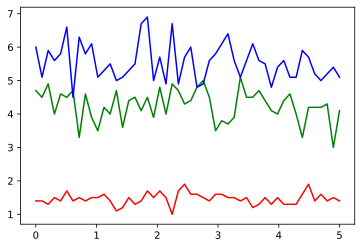

In [11]:
[plt.plot(np.linspace(0, 5, 50), np.compress(iris_name == name, iris_vals[:, 2]), color) for (name, color) in np.vstack((names, ['r', 'g', 'b'])).T];

## 7. Отобразите зависимость между `petallength` и `petalwidth` взависимости от типа ириса
по оси X - petallength   
по оси Y - petalwidth  
В ответе укажите класс, который отделился от остальных

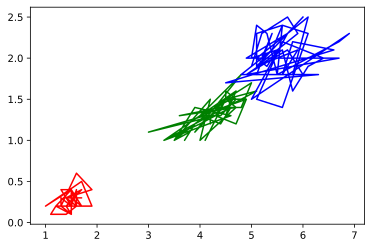

In [12]:
[plt.plot(np.compress(iris_name == name, iris_vals[:, 2]), np.compress(iris_name == name, iris_vals[:, 3]), color) for (name, color) in np.vstack((names, ['r', 'g', 'b'])).T];

## 8. Постройте boxplot признака `sepallength` для каждого типа Ириса
В ответе укажите количество выбросов в данных  
Каждый выброс отображается точкой, подробнее про boxplot можно почитать [здесь](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

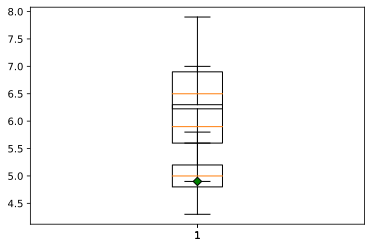

In [13]:
[plt.boxplot(np.compress(iris_name == name, iris_vals[:, 0]), flierprops=dict(markerfacecolor='g', marker='D')) for name in names];

# Python
Для следующих заданий необходимо реализовать соответствующую функцию в файле `tasks.py`.

После реализации, выполните соответствующую ячейку, не изменяя её содержимое.

## 9. За сколько шагов можно получить однозначное число перемножая цифры предыдущего числа.
Например, для $88$ ответ $3$:
$$
88 \rightarrow 8 \times 8 = 64 \rightarrow 6 \times 4 = 24 \rightarrow 2 \times 4 = 8
$$
Для этого задания, реализуйте функцию `find_fold_number`

In [14]:
assert find_fold_number(88) == 3, "неправильный ответ для числа из примера"

В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [15]:
''.join(map(str, (find_fold_number(i) for i in range(500))))

'00000000001111111111111112222211112222231112222323112223232311222232331122332433112222333311233333321111111111111111111111111222221111222223111222232311222323231122223233112233243311222233331123333332111111111111111222221112222323112222323311222233331222222222122332334212323234231223324233123332233311111111111111222223112222323311233333321223323342122324222312333223331223323444123342343313322334331111111111111222232311222233331223323342122332423312222222221233423433133322443312343233341332323343'

## 10. Кодирование длин серии
Кодирование длин серий (RLE) — алгоритм сжатия данных, заменяющий повторяющиеся символы на один символ и число его повторов. Серией называется последовательность, состоящая из нескольких одинаковых символов (более одного). При кодировании строка одинаковых символов, составляющих серию, заменяется строкой, содержащей сам повторяющийся символ и количество его повторов.

Например, для $\textit{AAAAAAAAAAAAAAABAAAA}$ будет сжата в $\textit{A15BA4}$

Для этого задания реализуйте функцию `rle`

In [16]:
assert rle('AAAAAAAAAAAAAAABAAAA') == 'A15BA4', "неправильный ответ для строки из примера"

В качестве ответа укажите результат выполнения следующей ячейки (без кавычек)

In [17]:
rle(test_rle_str)

'f4b13s13g15e12l18o12f4i6r14u8m5i15q3x17z6w4z19o7k10i16z16h7o10c14r7k3x17k2s8mc3d11p14n14s12b5ra6sj10k9r9y12a11u12w10g8l9v11b2g15q6l15x10a5e13v13d11pc4d16p15s12d18z19a19bf9k5x5w5h12t9r18o19c16p3h12u6r19y17j24g3a3x11l8u10m10f6m18g14t3j19'